<a id='top'></a>

# CSCI 3022: Intro to Data Science - Fall 2019 Practicum 2
***

This practicum is due on Canvas by **11:59 PM on Wednesday December 11**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
1. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.
1. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
2. You may **NOT** post to message boards or other online resources asking for help.
3. You may **NOT** copy-paste solutions *from anywhere*.
4. You may **NOT** collaborate with classmates or anyone else.
5. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**Name**:  Angel Santana 

***


**NOTES**: 

- You may not use late days on the practicums nor can you drop your practicum grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Bottom](#bot)

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from calendar import month_name, different_locale
from scipy import stats
import statsmodels.api as sm
from scipy.special import binom

<br>

---
<a id='p1'></a>
[Back to top](#top)

### [40 points] Problem 1:  Amazon Forest Fires

A non-profit orgranization is trying to protect the Amazon rain forest and has recruited you as their head data scientist. For your first task, they've given you a dataset with the number of fires in each state in the Amazon region during each month between 1998 and 2017. They would like to have a 95% confidence interval for the true median number of forest fires that occur in each state on a yearly basis. 

In [2]:
#Starter Code
df = pd.read_csv('amazon.csv', thousands='.', decimal ='/', engine='python')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
year      6453 non-null object
state     6452 non-null object
month     6454 non-null object
number    6448 non-null float64
date      6450 non-null object
dtypes: float64(1), object(4)
memory usage: 252.2+ KB


**Part A:**  This dataset isn't paticularly useful in it's current state, so we'll need to clean it up a bit. Some data scientists say that most of their job is to wrangle data, so this will give you a taste of cleaning a real world data set. Perform the following tasks:
1. Drop the 'date' column. The only information this column holds is the year, which we already have in another column. 
2. Drop any rows with null values in any of the remaining columns
3. Print all the unique values of the 'month' column. You'll notice that one is encoded with a differant character encoding then the format that pandas is using.
3. Convert the Portugese month names to English month names. We've included the 'month_name' and the 'different_encoding' modules of the python calendar library in the top cell above, if you would like to use them. There are many ways to accomplish this task, and these modules are not required, but may make things easier. As part of this step, you should make sure that the Portugese month with the encoding problem is translated to the correct English month. 
4. Check the number column for any values that seem impossible. Drop any negative or fractional values, or any values over 50,000. 50,000 is large enough that no Brazilian state would ever have that many forest fires in one month, so we should get rid of anything above 50000. 
5. Since you're new on the job, some of your co-workers may have played a prank on you... Print out all the unique values of the 'year' column and drop any rows with values that don't make sense.
6. Find the total number of rows remaining after you've done all of the above and write it out in a markdown cell. if you have correctly performed all of the tasks above, your dataframe should now have 6438 rows.

**NOTE:** Since some of these tasks are not totally trivial, you may use any resources other than your classmates on this part of this problem. This means you may consult google, stack overflow, the python/pandas documentation, some random book on pandas you might have, etc... But you may not consult your classmates for help. ***CITE ALL RESOURCES USED IN A CODE COMMENT. A URL OR A BOOK TITLE IS SUFFICIENT. ANY CODE OBIVOUSLY COPIED FROM OUTSIDE SOURCES WITH OUT A CITATION WILL EARN YOU NO CREDIT ON THIS PROBLEM. YOU ARE ALLOWED TO USE THESE RESOURCES ONLY ON THIS PART OF THIS PROBLEM!***

In [3]:
#Your code here

#drop the date column since it is duplicate
date = df.drop(['date'], axis=1) #select column to drop using drop() fubction
date = date.dropna()#drop the colum

#printing unique month
print("Unique Months: ")
print(date['month'].unique())
# for i in range(len(date['month'].unique())):
#     print[date[i]]
#replace the Portugese month names with English names using replace() function
date = date.replace({'Janeiro': 'January', 'Fevereiro': 'February', 'Maro': 'March', 'Abril': 'April', 'Maio': 'May', 'Junho': 'June', 'Julho': 'July', 'Agosto': 'August', 'Setembro': 'September', 'Outubro': 'October', 'Novembro': 'November', 'Dezembro': 'December'})

#check values and drop negatives
nonPositive = date[date['number']<0].index
date.drop(nonPositive, inplace=True)

#check values and drop values > 50,000
fiftyK = date[date['number']>=50000].index
date.drop(fiftyK, inplace=True)

#check values and drop all fractions
fracs = date[date['number'] != np.floor(date['number'])].index
date.drop(fracs, inplace=True)

#check the unique years and drop the values that don't go
dateYear = ['1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']

print("")

#print valid years
print("Valid years are:")
for i in range(len(dateYear)):
    print(dateYear[i])

#make array to store the number of invalid years
iy = []
for anos in date:
    if anos not in dateYear:
        iy.append(anos)
for anos in iy:
    date = date[date['year']!=anos]
# print("The Features remaining are:") 
#     for l in range(len(extraFeatures)):
#         print(extraFeatures[l])
#     return extraFeatures
numberofRows = len(date) - len(iy)
print("")
print("Total number of rows after data being cleaned:", numberofRows)

# Sources: 
# https://www.geeksforgeeks.org/python-string-replace/
# https://cmdlinetips.com/2018/04/how-to-drop-one-or-more-columns-in-pandas-dataframe/
# https://www.w3resource.com/python-exercises/numpy/python-numpy-exercise-90.php
# https://stackoverflow.com/questions/3061761/numpy-array-dimensions


Unique Months: 
['Janeiro' 'Fevereiro' 'Mar�o' 'Abril' 'Maio' 'Junho' 'Julho' 'Agosto'
 'Setembro' 'Outubro' 'Novembro' 'Dezembro']

Valid years are:
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017

Total number of rows after data being cleaned: 6438


**Part B:** Extract the median number of forest fires per month, yearly, by state. Store these median values in the given python dictionary.

For Example:

If one year of one state had the following numbers of fires:

Jan: 1

Feb: 2

Mar: 3

Apr: 4

May: 5

Jun: 6

Jul: 7

Aug: 8

Sep: 9

Oct: 10

Nov: 11

Dec: 12

Then the median number of forest fires per month would be 6.5 (the average of the two middle elements since this has an even length)

If the state of "test" had 5 years of recorded data, with the following median forest fire values: \[1, 2, 7, 9, 3\],  then python dictionary should look like: 

\{

    "test": [1, 2, 7, 9, 3]
    
\}

Below we've given you one of the states values in a test, so you can ensure you are calculating the medians correctly.

In [4]:
#GIVEN DICTIONARY CODE
median_num_fires_monthly_yearly = {
    'Acre': None,
    'Alagoas': None,
    'Amapa': None,
    'Amazonas': None,
    'Bahia': None,
    'Ceara': None,
    'Distrito Federal': None,
    'Espirito Santo': None,
    'Goias': None,
    'Maranhao': None,
    'Mato Grosso': None,
    'Minas Gerais': None,
    'Para': None,
    'Paraiba': None,
    'Pernambuco': None,
    'Piau': None,
    'Rio': None,
    'Rondonia': None,
    'Roraima': None,
    'Santa Catarina': None,
    'Sao Paulo': None,
    'Sergipe': None,
    'Tocantins': None  
}

In [5]:
# Your code here
data = median_num_fires_monthly_yearly #intialize to new var to make easier to use
# print(x)
for stateVals in data:#iterate through the array
    #make array to use to append values (median)
    medianDictionary = []
    #we are going to take the index labels in the row (state)
    indexLabel = df.loc[df['state'] == stateVals]
#     print(item) #test
    for date1 in dateYear:
        avg = indexLabel.loc[indexLabel['year'] == date1]
        medianDictionary.append(avg['number'].median())
#         print(medianDictionary)#test
    data[stateVals] = medianDictionary
#     print(item, medianDictionary)
    
    
    

In [6]:
#Given Test
assert median_num_fires_monthly_yearly['Acre'] == \
[1.5, 0.0, 1.0, 0.5, 1.0, 8.0, 7.0, 13.0, 6.0, 4.5, 0.0, 2.5, 6.0, 7.0, 5.0, 13.5, 12.0, 24.0, 33.5, 45.0] \
, "something is wrong here"

In [7]:
#DONT CHANGE THIS. WE USE IT TO MAKE THE OUTPUT LEGIBLE FOR GRADING
import pprint
pp = pprint.PrettyPrinter(indent=1)
pp.pprint(median_num_fires_monthly_yearly)

{'Acre': [1.5,
          0.0,
          1.0,
          0.5,
          1.0,
          8.0,
          7.0,
          13.0,
          6.0,
          4.5,
          0.0,
          2.5,
          6.0,
          7.0,
          5.0,
          13.5,
          12.0,
          24.0,
          33.5,
          45.0],
 'Alagoas': [0.0,
             4.0,
             7.5,
             3.0,
             13.0,
             12.5,
             6.5,
             11.5,
             8.0,
             4.5,
             18.0,
             21.5,
             10.5,
             20.0,
             24.5,
             14.5,
             12.5,
             36.0,
             13.5,
             8.5],
 'Amapa': [0.0,
           1.5,
           1.0,
           0.5,
           5.0,
           8.0,
           7.0,
           3.0,
           4.0,
           0.0,
           2.0,
           4.0,
           2.0,
           4.0,
           13.0,
           2.5,
           7.0,
           9.5,
           12.0,
           3.0

**Part C:** Since we cannot rely on the central limit thereom for the median, we'll bootstrap some samples. Bootstrap 1000 samples for each state. Each bootstrapped sample should have 50 values drawn from the original sample.

Find the median of each bootstrapped sample, and add it to a list. Save the list of median values for the states of **Sao Paulo** and **Goias**. We'll use them later to plot in part D. Then determine the 95% confidence interval of the true median from each list of bootstrapped medians for each state. Add a list of the low and high values of the confidence interval to the given python dictionary below. To help you check your work, the confidence interval of the state of Acre should be from roughly 4 to 7. Your values will change though, because each bootstrapped sample is picked randomly from the original.

For Example:

If the 95% confidence interval on the median is from 6 to 22 for the state of "test", then the dictionary would look like:

{

    "test": [6, 22]
    
}

In [8]:
#GIVEN CODE
median_num_fires_bootstrap = {
    'Acre': None,
    'Alagoas': None,
    'Amapa': None,
    'Amazonas': None,
    'Bahia': None,
    'Ceara': None,
    'Distrito Federal': None,
    'Espirito Santo': None,
    'Goias': None,
    'Maranhao': None,
    'Mato Grosso': None,
    'Minas Gerais': None,
    'Para': None,
    'Paraiba': None,
    'Pernambuco': None,
    'Piau': None,
    'Rio': None,
    'Rondonia': None,
    'Roraima': None,
    'Santa Catarina': None,
    'Sao Paulo': None,
    'Sergipe': None,
    'Tocantins': None  
}

In [9]:
#Your code here.
# brazilStates = median_num_fires_bootstrap
#initialize storing arrays for the medians of Sao P and Goias
mS, mG = [], []

#create for loop to iterate through the given dictionary
for states in median_num_fires_bootstrap:
    #storing array for the medians of each state 
    stateMedians = []
    
#     '''Create variable to store the current sample and so 
#     we can have evry value at hand '''
    bootstrap = date.loc[date['state']==states, 'number']
    
    #we want to iterate 1000 times to get a 1000 sample size 
    for size in range(1000):
        #now choose 50 random samples from the original sample
        oneKSample = np.random.choice(bootstrap, 50, replace=True)
        #find the median of those samples 
        mSample = np.nanmedian(oneKSample)
        
        #store those medians of the samples 
        stateMedians.append(mSample)
        
    #compute the CI and store in the dictionary
    confInt = stats.t.interval(.95, len(stateMedians), np.median(stateMedians), scale = stats.sem(stateMedians))
    median_num_fires_bootstrap[states] = confInt
    
    #now search for Sao P and Goias
    if states == 'Sao Paulo': 
        mS.append(stateMedians)
    if states == 'Goias':
        mG.append(stateMedians)
    

In [10]:
#DONT CHANGE THIS. WE USE IT TO MAKE THE OUTPUT LEGIBLE FOR GRADING
import pprint
pp = pprint.PrettyPrinter(indent=1)
pp.pprint(median_num_fires_bootstrap)

{'Acre': (4.5781366185165435, 5.4218633814834565),
 'Alagoas': (10.234955302578747, 10.765044697421253),
 'Amapa': (2.7444504795132385, 3.2555495204867615),
 'Amazonas': (63.099906807458176, 67.90009319254183),
 'Bahia': (241.00125769869115, 246.99874230130885),
 'Ceara': (42.568644042642504, 47.431355957357496),
 'Distrito Federal': (1.9086718502741837, 2.091328149725816),
 'Espirito Santo': (12.805118186032777, 13.194881813967223),
 'Goias': (125.86957372500552, 132.13042627499448),
 'Maranhao': (566.2535392687896, 615.2464607312104),
 'Mato Grosso': (425.4826580095616, 444.5173419904384),
 'Minas Gerais': (150.00804225792947, 156.99195774207053),
 'Para': (559.0995574946459, 634.9004425053541),
 'Paraiba': (49.14484466372779, 50.85515533627221),
 'Pernambuco': (26.233784812949406, 27.766215187050594),
 'Piau': (220.21166679310326, 235.78833320689674),
 'Rio': (24.50896930380367, 25.49103069619633),
 'Rondonia': (58.75787051049122, 64.74212948950878),
 'Roraima': (40.635918544094146,

**Part D:** Plot a histogram of the frequency of different median values for the two states **Sao Paulo** and **Goias**. Overlay these histograms on the same plot. Include axis labels, a title, a legend, etc. Choose two colors that work well together and provide enough contrast (e.g. No one can see gold overlayed with yellow), and use reasonable values of the **alpha** parameter so you can see both histograms. Plot two vertical lines that represent the outer bounds of the 95% confidence interval on the true median for each state, in the same color as the state. Does the data for the median look normally distributed? Why or why not? Does this validate our decision to not use the central limit theorem and instead bootstrap our median samples? Explain in a markdown cell below.

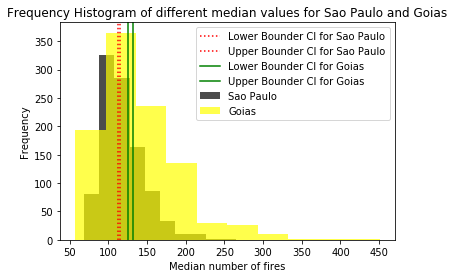

In [11]:
#Your code here.
#initialize plt for both histograms 
plt.hist(mS, alpha = .7, color = 'black', label = "Sao Paulo")
plt.hist(mG, alpha = .7, color = 'yellow', label = "Goias")

#plot lines for the CI's of Goias and Sao Paulo
x1, y1 = median_num_fires_bootstrap['Sao Paulo']
x2, y2 = median_num_fires_bootstrap['Goias']

plt.axvline(x=x1, color = 'r', linestyle = ':', label = "Lower Bounder CI for Sao Paulo")
plt.axvline(x=y1, color = 'r', linestyle = ':', label = "Upper Bounder CI for Sao Paulo")
plt.axvline(x=x2, color = 'g', linestyle = '-', label = "Lower Bounder CI for Goias")
plt.axvline(x=y2, color = 'g', linestyle = '-', label = "Upper Bounder CI for Goias")

#print title
plt.title("Frequency Histogram of different median values for Sao Paulo and Goias")
#print x and y axis labels
plt.ylabel("Frequency")
plt.xlabel("Median number of fires")

#print legend
plt.legend()

- From the histograms we can see that most of the data is to the right of the Sao Paulo and Goias peaks, therefore the data is not distributed normally because it is not symmetrical. This confirms our validation that we shouldn't use the central limit theorem because it does not follow the CLT definition which states: $\textit{when independent variables are added, the normalized sum will tend to go toward a normal distribution}$, and in our case, the histograms show that our data does not have a normal distribution. That is why we use the bootstrap method for our median samples.


<br>

---
<a id='p2'></a>
[Back to top](#top)

### [40 points] Problem 2:  Sharknado Prediction

Governor Hickenlooper has charged you with the task of assessing the factors associated with sharknado risk in Colorado. As everyone knows, sharknadoes are a leading cause of sharknado-related illness, and you are a world-renowned data/shark scientist.

You decide to use multiple linear regression to understand and predict what factors lead to increased sharknado hazard. Your lead scientist, aptly named Fin, has collected lots of relevant data at a local sharknado hotspot, the Boulder Reservoir[\*](#footnote). The data cover a variety of sharknado-related environmental and other conditions, and you'll find this data in the file `sharknadoes.csv`. 

**Response**: 

- $\texttt{sharknado hazard}$: the hazard of a sharknado, where 1 is very unlikely and 100 is highly likely

**Features**: 

- $\texttt{taunts}$: the number of times over the past year that someone has taunted a shark
- $\texttt{clouds}$: what percentage of the sky was covered by clouds (fraction, 0-1)
- $\texttt{precipitation}$: amount of precipitation in the past 72 hours (inches)
- $\texttt{earthquake}$: the intensity of the most recent earthquake measured in the continental United States
- $\texttt{shark attacks}$: the number of shark attacks within 72 hours prior to the observation
- $\texttt{ice cream sold}$: the number of units of ice cream sold at the beach concession stand 
- $\texttt{misery index}$: an economic indicator for how miserable the average United States citizen is, based on the unemployment rate and the inflation rate. More [here](https://www.stuffyoushouldknow.com/podcasts/whats-the-misery-index.htm) and [here](https://en.wikipedia.org/wiki/Misery_index_(economics)). Higher values correspond to more miserable citizens.
- $\texttt{temperature}$: the outside temperature, measured in degrees Fahrenheit
- $\texttt{humidity}$: relative humidity (percent, 0-100)
- $\texttt{pizzas sold}$: the number of pizzas sold at the beach concession stand in the past year
- $\texttt{pressure}$: local air pressure (millibar) 
- $\texttt{octopuses}$: the number of octupuses in the vicinity on the day of the observation
- $\texttt{Zach's shoe size}$: the size of the shoes Zach was wearing when the observation was made
- $\texttt{Rachel's shoe size}$: the size of the shoes Rachel was wearing when the observation was made

**Part A**: Read the data from `sharknadoes.csv` into a Pandas DataFrame.  Note that since we will be doing a multiple linear regression we will need all of the features. To make sure the data is "clean", drop any row in the DataFrame that is missing data. 

In [12]:
#Your code here.
dfShark = pd.read_csv("sharknadoes.csv")
dfShark = dfShark.dropna()
dfShark.head()

clouds  earthquake  pizzas sold  taunts  pressure  shark attacks  \
0    1.00         7.1       5560.0    15.0    847.12            2.0   
1    1.00         7.4       5179.0    20.0    844.34            4.0   
2    1.00         7.0       5227.0     0.0    839.48            9.0   
3    0.13         7.9       5226.0    34.0    851.28            2.0   
4    1.00         7.5       5491.0     6.0    852.67            2.0   

   octopuses  precipitation  misery index  ice cream sold  humidity  \
0        7.0       0.824059     12.987180           273.0     86.41   
1        5.0       0.993296     16.765435           184.0     96.67   
2        2.0       1.173342     16.494518           141.0     53.85   
3        6.0       0.919291      8.277176           146.0     88.72   
4        4.0       1.729127      5.904750           178.0     63.08   

   temperature  Zachs shoe size  Rachels shoe size  sharknado hazard  
0         78.0             42.0                9.0             40.22  
1         89.0             42.0                9.5             36.42  
2         65.0              9.5                9.0             19.54  
3         36.0              9.5               10.0             85.00  
4         72.0             42.0                9.0             56.34

**Part B**: Perform the appropriate statistical test at the $\alpha = 0.025$ significance level to determine if _at least one_ of the features is related to the the response $y$.  Clearly describe your methodology and show all computations in Python. 

- We want to compute an F test, with the following hypothesis:
    - First hypothesis (The Null Hypothesis):
        - Each $\beta_{x}$ value represents a feature in the data set
        - $H_0: \beta_{1\dots14}=0$
    - Second Hypothesis (The Alternate Hypothesis):
        - Let $\textbf{f}$ represent a feature in the data set
        - $H_1: \beta_f \neq 0$ for at least one $\textbf{f}$ feature [$1\dots14$]




In [13]:
#Your code here.

sharkY = dfShark["sharknado hazard"]
sharkX = dfShark.loc[:,dfShark.columns != "sharknado hazard"]
sharkX = sm.add_constant(sharkX)
sharkmodel = sm.OLS(sharkY, sharkX).fit()
sharkmodel.summary()


/Users/angelantoniosantanahernandez/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       sharknado hazard   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           9.60e-42
Time:                        23:06:15   Log-Likelihood:                -174.23
No. Observations:                  72   AIC:                             378.5
Df Residuals:                      57   BIC:                             412.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2549.8985     67.605    -37.718      0.000   -2685.275   -2414.522
clouds               -1.5106      2.566     -0.589      0.558      -6.650       3.628
earthquake            2.5079      0.467      5.367      0.000       1.572       3.444
pizzas sold          -0.0006      0.002     -0.373      0.711      -0.004       0.003
taunts                0.3117      0.042      7.447      0.000       0.228       0.396
pressure              3.0688      0.079     38.850      0.000       2.911       3.227
shark attacks        -0.1151      0.144     -0.797      0.429      -0.404       0.174
octopuses            -0.0749      0.143     -0.524      0.602      -0.361       0.211
precipitation         1.3982      0.930      1.503      0.138      -0.464       3.261
misery index          0.0273      0.080      0.340      0.735      -0.133       0.188
ice cream sold        0.0096      0.008      1.193      0.238      -0.007       0.026
humidity              0.0188      0.027      0.706      0.483      -0.035       0.072
temperature          -0.4426      0.053     -8.396      0.000      -0.548      -0.337
Zachs shoe size       0.0271      0.023      1.175      0.245      -0.019       0.073
Rachels shoe size     0.2814      1.273      0.221      0.826      -2.268       2.831
==============================================================================
Omnibus:                        0.821   Durbin-Watson:                   2.225
Prob(Omnibus):                  0.663   Jarque-Bera (JB):                0.300
Skew:                           0.005   Prob(JB):                        0.861
Kurtosis:                       3.316   Cond. No.                     1.03e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As we can see in this OLS model, we see that our F-test is = $179.4$ and a P-Value of $9x10^{-42}$. From this information, we can tell that it is much less than our $\alpha = 0.25$, thus we can neglect our NULL Hypothesis ($H_0$) and we can say that there is at least one feature that is provided in the data file that correlates to our answer.

**Part C**: Write a function `backward_select(df, resp_str, maxsse)` that takes in the DataFrame (`df`), the name of the column corresponding to the response (`resp_str`), and the maximum desired sum of squared errors (`maxsse`), and returns a list of feature names corresponding to the most important features via backward selection.  Use your code to determine the reduced MLR model with the minimal number of features such that the SSE of the reduced model is less than 570. At each stage in backward selection you should remove the feature that has the highest p-value associated with the hypothesis test for the given slope coefficient $\beta_k \neq 0$.

Your code should clearly indicate which feature was removed in each stage, and the SSE associated with the model fit before the feature's removal. _Specifically, please write your code to print the name of the feature that is going to be removed and the SSE before its removal_. Afterward, be sure to report all of the retained features and the SSE of the reduced model.

**Note**: The point of this exercise is to see if you can implement **backward_select** yourself.  You may of course use canned routines like statmodels OLS, but you may not call any Python method that explicitly performs backward selection.

In [14]:

def backward_select(df, resp_str = "sharknado hazard", maxsse=570):
    #Your code here.
      #here we will just add the extra features that our left into an array
#     extraFeatures = []
    
    #first we will start by saving the response string to the array df
    respA = df[resp_str]
    
    #next we will get any possible features
    extraFeatures = list(df.columns[df.columns != resp_str])
    
    #now we will want to indialize all the good features to our extraFeatures
    goodFeatures = extraFeatures
    
    #initalize sse
    sse = 0
    
    #we want to backward select all of the good features and drop the highest p values 
    #start by initializing the stage to begin at 
    stage  = 1
    #start backward selecting
    bwS = df[extraFeatures]#array of our extra features
    bwS = sm.add_constant(bwS)
    modelbwS = sm.OLS(respA, bwS).fit() 
    sse = np.sum((respA-modelbwS.predict(bwS))**2)

    while maxsse >sse:#use while loop to finishup the backward selecting
        #we want to remove the feature with the highest p value 
        remF = modelbwS.pvalues.idxmax() #using idxmax to find the index of max value (geeksforgeeks)
        #now set the new features to the extra features, but as a copy 
        newFeatures = extraFeatures.copy()
        #now remove the features and make the new features 
        newFeatures.remove(remF)
        #--------------------------------------#        
        #after removing the features, we want to make a new set with out the features to remove 
        bwS = df[newFeatures]
        bwS = sm.add_constant(bwS)
        #create the model 
        modelbwS = sm.OLS(respA, bwS).fit()
        
        #now we want to reduce the sse
        sse = np.sum((respA-modelbwS.predict(bwS))**2)
        
        #making if statement to print the removed features
        if sse > maxsse:
            print("")
        else:
            extraFeatures.remove(remF)
            print("    ___ Stage", stage, "___\nFeature Removed: ", remF, "\nSSE:", sse)#using round function to round up to 4 decimals
        
            print("")
        #increment the stage
        stage = stage + 1


    print("The Features remaining are:") 
    for l in range(len(extraFeatures)):
        print(extraFeatures[l])
    return extraFeatures
    
goodFeatures = backward_select(dfShark, resp_str="sharknado hazard", maxsse=570)

    ___ Stage 1 ___
Feature Removed:  Rachels shoe size 
SSE: 533.4003410558921

    ___ Stage 2 ___
Feature Removed:  misery index 
SSE: 534.6875698945835

    ___ Stage 3 ___
Feature Removed:  octopuses 
SSE: 536.5069911256901

    ___ Stage 4 ___
Feature Removed:  clouds 
SSE: 539.49656163576

    ___ Stage 5 ___
Feature Removed:  pizzas sold 
SSE: 543.357200472107

    ___ Stage 6 ___
Feature Removed:  humidity 
SSE: 547.4141982866556

    ___ Stage 7 ___
Feature Removed:  shark attacks 
SSE: 552.1548653819143

    ___ Stage 8 ___
Feature Removed:  Zachs shoe size 
SSE: 564.1068895239198


The Features remaining are:
earthquake
taunts
pressure
precipitation
ice cream sold
temperature


**Part D**: Write down the final multiple linear regression model, including estimated parameters, obtained by your backward selection process. 

In [16]:
#Your code here.
bwS = dfShark["sharknado hazard"]
dfX = dfShark.loc[:,goodFeatures]
dfX = sm.add_constant(dfX)
xModel = sm.OLS(bwS, dfX).fit()
xModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       sharknado hazard   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     450.3
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           6.28e-51
Time:                        23:06:28   Log-Likelihood:                -176.27
No. Observations:                  72   AIC:                             366.5
Df Residuals:                      65   BIC:                             382.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2542.0392     59.776    -42.526      0.000   -2661.420   -2422.659
earthquake         2.4012      0.435      5.520      0.000       1.532       3.270
taunts             0.3188      0.037      8.534      0.000       0.244       0.393
pressure           3.0618      0.071     42.836      0.000       2.919       3.205
precipitation      1.2559      0.885      1.419      0.161      -0.512       3.023
ice cream sold     0.0099      0.008      1.311      0.194      -0.005       0.025
temperature       -0.4680      0.033    -14.220      0.000      -0.534      -0.402
==============================================================================
Omnibus:                        1.389   Durbin-Watson:                   2.233
Prob(Omnibus):                  0.499   Jarque-Bera (JB):                0.798
Skew:                           0.210   Prob(JB):                        0.671
Kurtosis:                       3.300   Cond. No.                     1.50e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From looking at our model we can see that the reduced model is taking the constant coefficient and adding it to our remaining features multiplied by their coefficient. So we get: 

$\hat{y} = -2542.04 + [(2.4*earthquake) + (.32*taunts) + (3.06*pressure) + (1.25*precipiation) + (.0099*IceCreamSold) + (-.468*temperature)]$

**Part E**: Perform the appropriate statistical test at the $\alpha = 0.025$ significance level to determine whether there is a statistically significant difference between the full model with all features and the reduced model obtained by backward selection in **Part D**. You may use output from your model fit above, but all calculations should be set up in Markdown/MathJax.

1. Our first hypothesis (The Null Hypothesis $H_0$) that we want to test is for the the features that were not included in our reduced model are 0. 
    - These features include: 
        - Zach's shoe size (Zs), Rachel's shoe size(Rs),Pizzas sold (Ps), Octupuses(O), Misery Index(Mi), Clouds(C), Humidity(H), Shark attacks(Sa). 
    - In math terms we have: 
        - $H_0 \rightarrow{} \beta_{Zs} =  \beta_{Rs}= \beta_{Ps}= \beta_{O}= \beta_{Mi}= \beta_{C}=\beta_{H}= \beta_{Sa} = 0$
        
2. Our second hypothesis (The Alternate Hypothesis $H_1$), we want to test whether one of these slopes from the features that were not included in our reduced model are important.
    - We will let $AH$ represent at least one feature from our set of remaining features (Zs, Rs, Ps, O, Mi, C, H, Sa)
    - In math terms we have: 
        - $H_1 \rightarrow{} \beta_{AH} \neq 0$, where at least one AH exists in the set {$Zs, Rs, Ps, O, Mi, C, H, Sa$}
        
With this information we can evaluate our hypthesis using a **Partial F-Test**. We get the following equation:
- $F = \frac{\frac{(SSE_{reducedModel} - SSE_{FullModel})}{p-k}}{\frac{SSE_{FullModel}}{n-p-1}} \rightarrow{} F_{p-k, n-p-1}$

Knowing this equation and the information, we can code it up using python.

In [17]:
#first find the Sum of Squares error for Reduced and Complete models
#finding the sse for the reduced model
sseReduced = np.sum((bwS - xModel.predict(dfX))**2)
print("SSE for the Reduced Model is:", sseReduced)
#finding the sse for the full model 
sseFullModel = np.sum((bwS - sharkmodel.predict(sharkX))**2)
print("SSE for the Full Model is:",sseFullModel)
#------------------------------------------------------
#now we can initialize the variables p, k, n, and our alpha value
n = len(dfShark)#length of dfShark
k = len(goodFeatures)#length of the good features
p = len(dfShark.columns) - 1 #end of the columns
alpha = 0.025 #our alpha value
#------------------------------------------------------
#find the parameters that were used in the models (Reduced and Complete)
#number of additional Parameters in model
addP = p-k
print("Number of ADDITIONAL Paramaters for the Full Model is: ", addP)
#overall Parameters used
overallP = n-p-1
print("Number of overall parameters for the Full Model is:", overallP)
#------------------------------------------------------
#Using our F - test equation
#find the top half information first to make it easier
#sse reduced - sse complete
sseRC = (sseReduced - sseFullModel)/(addP)
#find the second half information based on the equation
#sse complete / overall parameters used from the data set
sseCDOP = (sseFullModel)/(overallP)
#plug info into F equation
F = (sseRC)/(sseCDOP)
print("Result of our Partial F-Test is:", round(F, 5))
#------------------------------------------------------
#now we want to find the P value
P_Value = 1 - stats.f.cdf(F, addP, overallP)
print("P_Value(>F) is:",P_Value)

#now we want to find the risk ratio
riskRatio = stats.f.ppf(1-alpha, addP, overallP)
print("Risk Ratio: F>=",riskRatio)


SSE for the Reduced Model is: 564.1068895239198
SSE for the Full Model is: 532.9436707404283
Number of ADDITIONAL Paramaters for the Full Model is:  8
Number of overall parameters for the Full Model is: 57
Result of our Partial F-Test is: 0.41663
P_Value(>F) is: 0.9063234965603284
Risk Ratio: F>= 2.423771022676205


We neglect the Alternate Hypothesis, and accept the Null Hypothesis. This concludes that there is not enough evidence to show that the Full Model is statistically better than the Reduced Model


**Part F**: Based on your conclusions in **Part E**, use the _better_ of the two models to predict the sharknado hazard when the following features are observed: 

- $\texttt{taunts}$: 47
- $\texttt{clouds}$: 0.8
- $\texttt{precipitation}$: 1 inch
- $\texttt{earthquake}$: 5
- $\texttt{shark attacks}$: 11
- $\texttt{ice cream sold}$: 120
- $\texttt{misery index}$: 15
- $\texttt{temperature}$: 70 degrees F
- $\texttt{humidity}$: 83
- $\texttt{pizzas sold}$: 5500
- $\texttt{pressure}$: 850 millibar 
- $\texttt{octopuses}$: 6
- $\texttt{Zach's shoe size}$: 9.5
- $\texttt{Rachel's shoe size}$: 9

In [18]:
#Your code here.

#first we want to create our dictionary set with the information given to us
#the form of the data set will be 
# "feature": value
features = {"const": 1, "taunts":47, "clouds":0.8, "precipitation":1,\
            "earthquake":5, "shark attacks": 11, "ice cream sold": 120, \
           "misery index": 15, "temperature": 70, "humidity": 83, "pizzas sold": 5500, \
           "pressure": 850, "octupuses": 6, "Zach's Shoe size": 9.5, \
           "Rachel's Shoe size": 9}
print("")
x = len(features)
# print(x)
print("We observed the following", x, "features:")
for key in features:
    print(key)
# print(features)
#create variable to be able to find the yhat value 
YValue = 0

#now we want to be ale to iterate through our data using zip because 
# of the way our data is set up
for data, value in zip(xModel.params.index, xModel.params):
    YValue = YValue + features[data]*value
print("")
print("Using the feature values")
for key2 in features:
    print(features[key2])
print("")
print("We were able to get We get a Sharknado Hazard of:", round(YValue, 5))




We observed the following 15 features:
const
taunts
clouds
precipitation
earthquake
shark attacks
ice cream sold
misery index
temperature
humidity
pizzas sold
pressure
octupuses
Zach's Shoe size
Rachel's Shoe size

Using the feature values
1
47
0.8
1
5
11
120
15
70
83
5500
850
6
9.5
9

We were able to get We get a Sharknado Hazard of: 57.19235


**Part G:** Consider the model you used in Part E, and consider the fact that you are trying to predict **sharknado hazard**. What is one critical drawback to the MLR model (or any MLR model) for predicting shardnado hazard? What are some modifications that could improve on this issue?

- One drawback from using the MLR model is that because a Sharknado Hazard is between 1-100 the MLR model will predict values outside of this range. 


- Some modifcations that can be done to imporve the issue is to be able to use a more logistic regression model where the output will be between 1 and 100 instead of the outputs that the MLR model gives (-1 and 1)